# Transfer txt to csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import optuna
from optuna import Trial

In [2]:
train_txt = pd.read_csv("file:///C:/Users/Mr Nam/09-14-2020/Assignments/Failure Prediction/data/data_train.txt",sep=" ",header=None)

In [3]:
test_txt=pd.read_csv("file:///C:/Users/Mr Nam/09-14-2020/Assignments/Failure Prediction/data/data_test.txt",sep=" ",header=None)

In [4]:
train_txt

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [5]:
test_txt

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [6]:
col_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23']

In [7]:
train_txt.columns =col_names
test_txt.columns =col_names

In [8]:
train_txt.to_csv("failure_train")
test_txt.to_csv("failure_test")

In [9]:
print(train_txt.isnull().sum())
print(test_txt.isnull().sum())

id              0
cycle           0
setting1        0
setting2        0
setting3        0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
s7              0
s8              0
s9              0
s10             0
s11             0
s12             0
s13             0
s14             0
s15             0
s16             0
s17             0
s18             0
s19             0
s20             0
s21             0
s22         20631
s23         20631
dtype: int64
id              0
cycle           0
setting1        0
setting2        0
setting3        0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
s7              0
s8              0
s9              0
s10             0
s11             0
s12             0
s13             0
s14             0
s15             0
s16             0
s17             0
s18             0
s19             0
s20             0
s21             0
s22         130

# Labeling for train data and test data

In [10]:
train_data=pd.read_csv("file:///C:/Users/Mr Nam/09-14-2020/failure_train",index_col=0)
test_data=pd.read_csv("file:///C:/Users/Mr Nam/09-14-2020/failure_test",index_col=0)

In [11]:
a=train_data['id'].value_counts()
count=list(a.sort_index())
index=[]
for c in count:
    contain=list(range(c))
    contain.reverse()
    index=index+contain

In [12]:
train_data['label']=index

In [13]:
test_label = pd.read_csv('file:///C:/Users/Mr Nam/09-14-2020/Assignments/Failure Prediction/data/data_truth.txt', header = None)

In [14]:
truth = test_label[0]
ttf = [None]*101
truth_max = [None]*101

In [15]:
for i in range(1,101):
    truth_max[i] = truth[i-1] + test_data[test_data['id'] == i]['cycle'].max()

In [16]:
for i in range(1,101):
    ttf[i] = truth_max[i] - test_data[test_data['id'] == i]['cycle']

In [17]:
ttf_col = pd.concat(ttf, axis = 0)
test_data['label'] = ttf_col

In [18]:
test_data

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,s22,s23,label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN,21


In [19]:
train_data.to_csv("failure_train")
test_data.to_csv("failure_test")

In [20]:
train_data["bnc"]=0
test_data["bnc"]=0

In [21]:
train_data["bnc"][train_data[train_data["label"]<31].index]=1
test_data["bnc"][test_data[test_data["label"]<31].index]=1

<ipython-input-21-626f1a5c0a06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["bnc"][train_data[train_data["label"]<31].index]=1
<ipython-input-21-626f1a5c0a06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["bnc"][test_data[test_data["label"]<31].index]=1


# VISUALIZE AND FEAtURE ENGINEERING

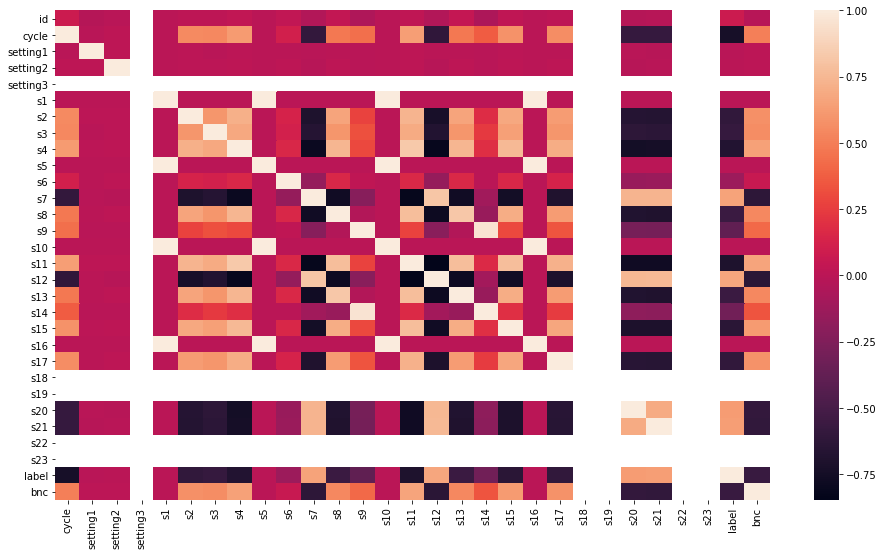

In [22]:
fig = plt.figure(figsize=(16, 9))
train_data_corr=train_data.corr().drop(train_data.columns[:1],axis=1)
sns.heatmap(train_data_corr)

In [23]:
np.absolute(train_data.corr()['label']).sort_values().to_frame()

,label
s16,3.799205e-15
s10,1.414118e-14
s1,1.535649e-14
s5,1.561885e-14
setting2,1.947628e-03
setting1,3.198458e-03
id,7.875253e-02
s6,1.283484e-01
s14,3.067689e-01
s9,3.901016e-01


In [24]:
train_data.drop(["s22","s23","s18","s19","setting3"],axis=1,inplace=True)
test_data.drop(["s22","s23","s18","s19","setting3"],axis=1,inplace=True)

In [25]:
cycle = [None]*101
for i in range(1,101):
     cycle[i] = train_data[train_data['id'] == i]['cycle']/train_data[train_data['id'] == i]['cycle'].max()
cycle_col = pd.concat(cycle, axis =0)
train_data['per_cycle'] = cycle_col

In [26]:
train_data[train_data['id'] == i][train_data.columns[5]]

20431    642.25
20432    642.37
20433    643.13
20434    642.33
20435    641.90
          ...  
20626    643.49
20627    643.54
20628    643.42
20629    643.23
20630    643.85
Name: s2, Length: 200, dtype: float64

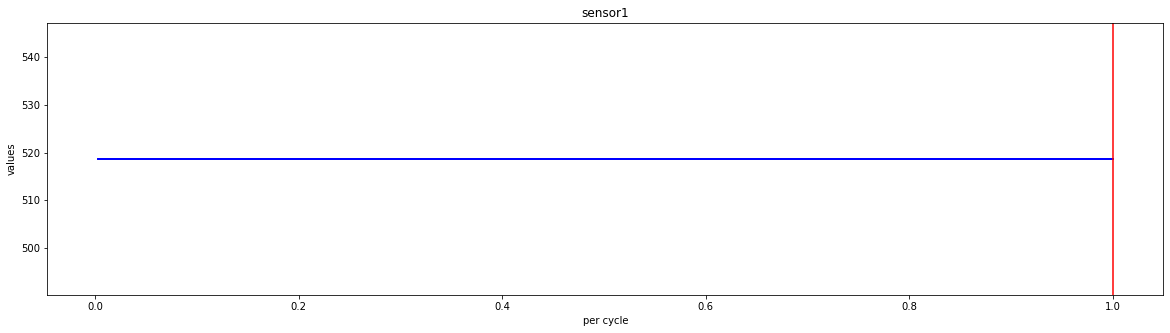

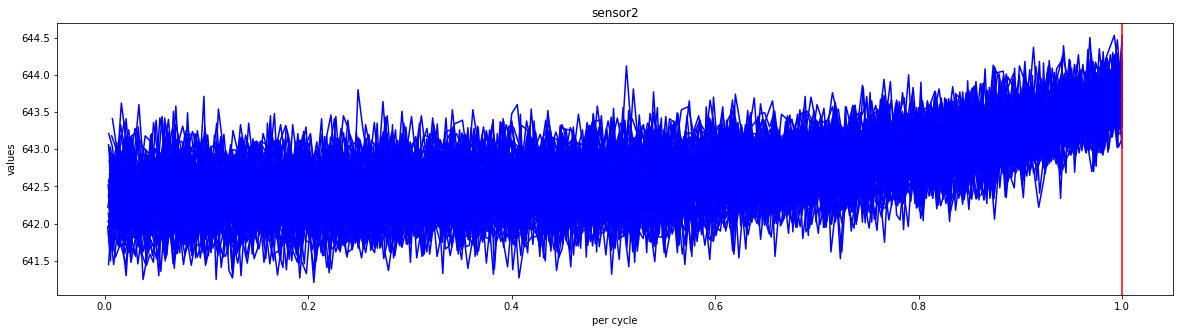

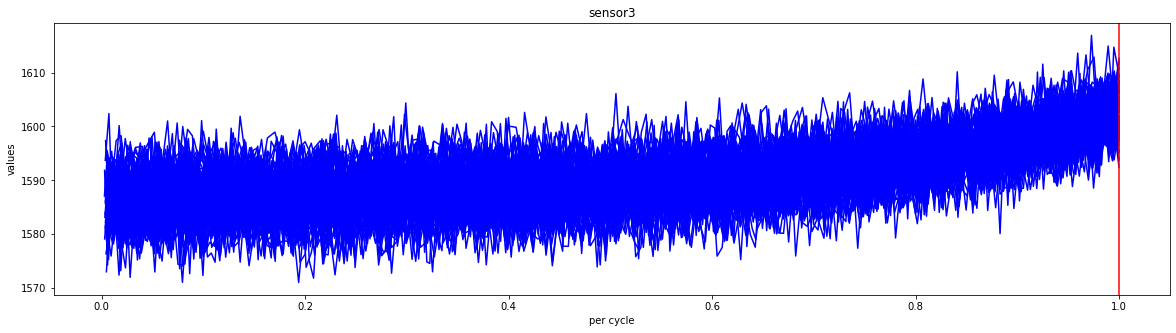

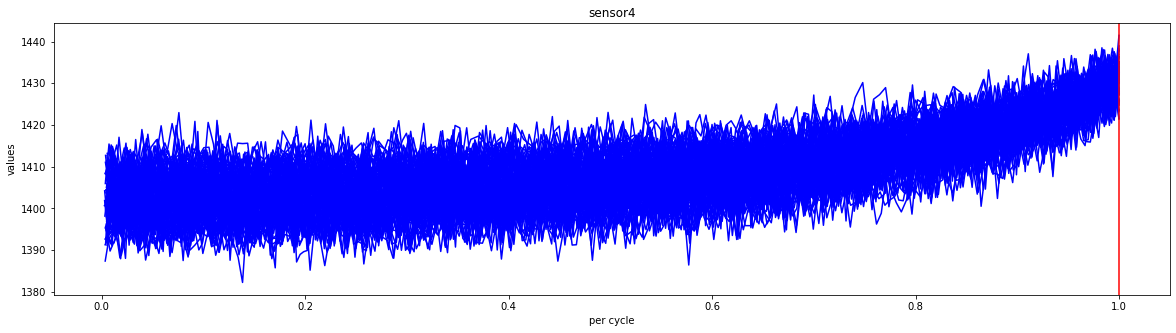

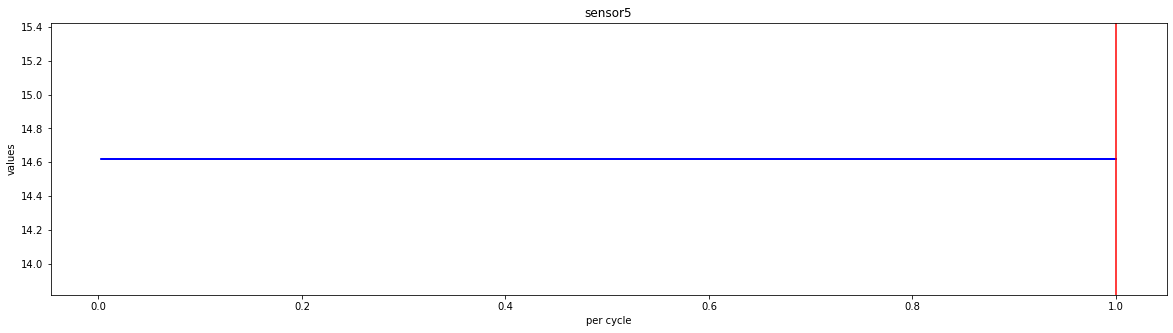

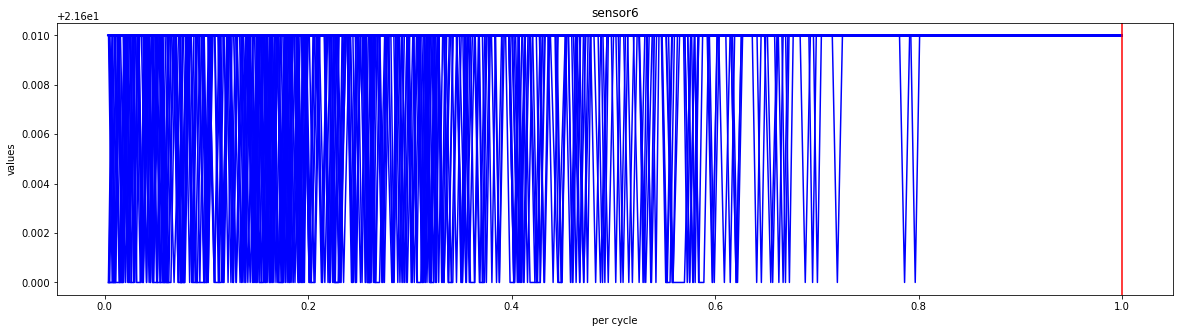

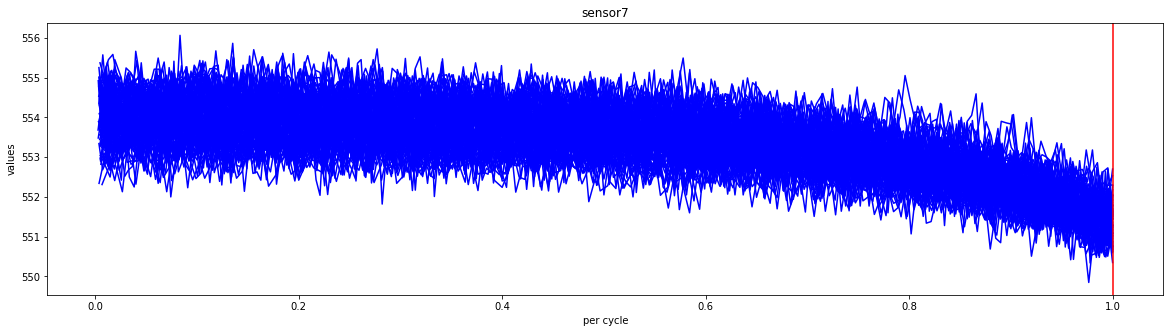

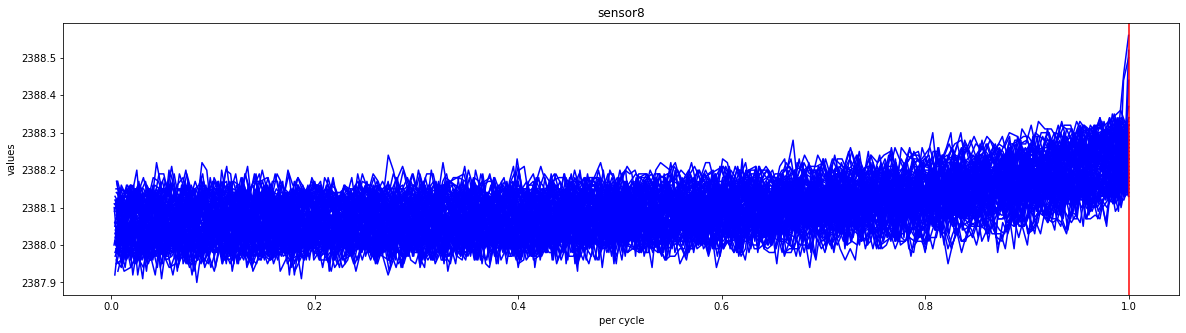

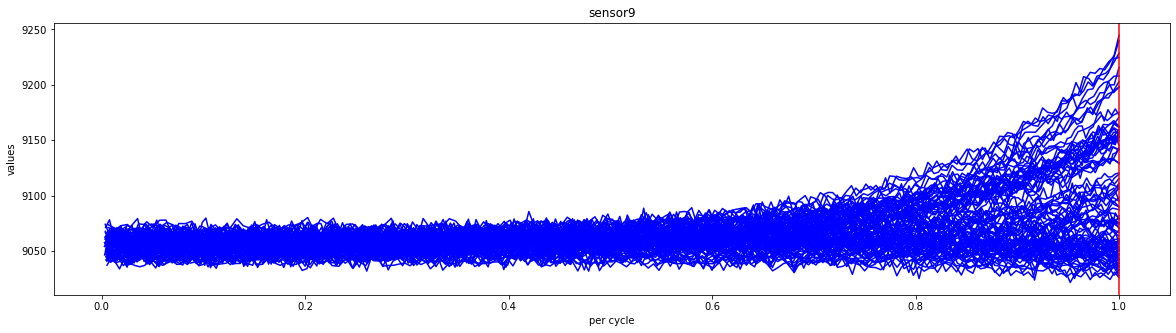

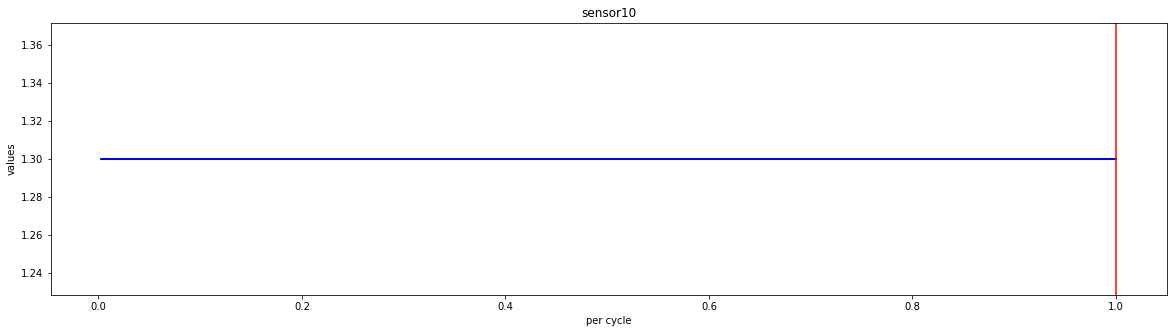

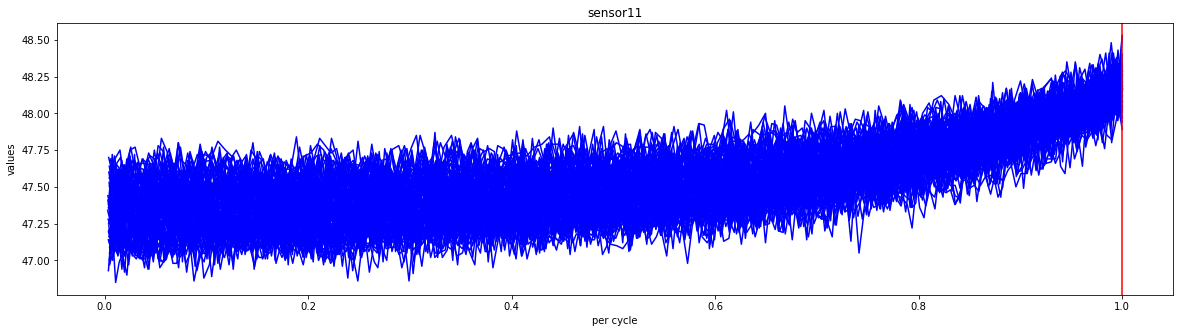

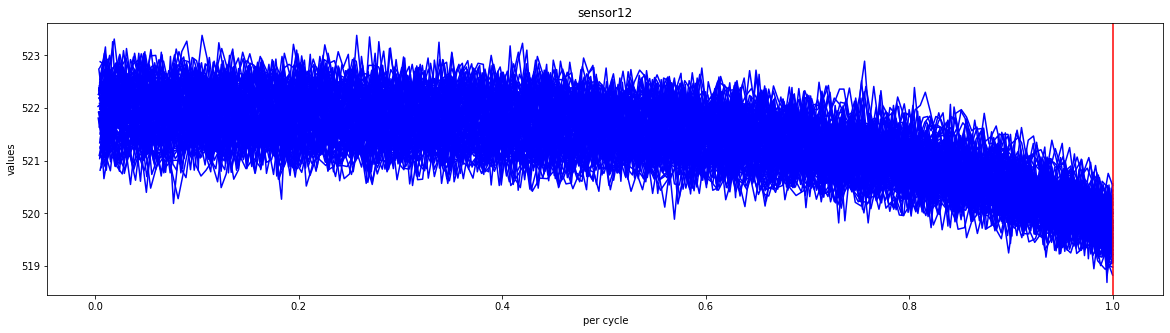

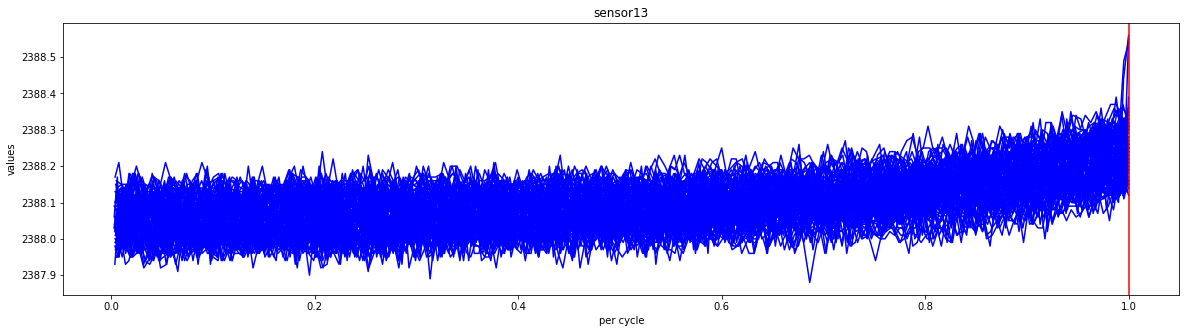

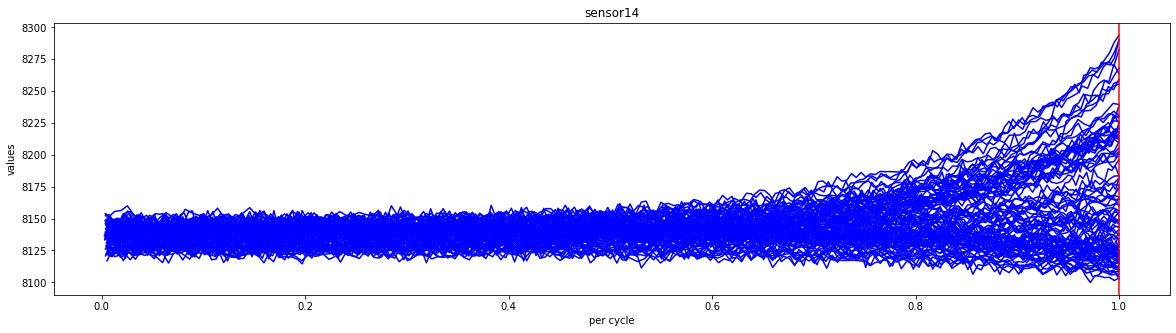

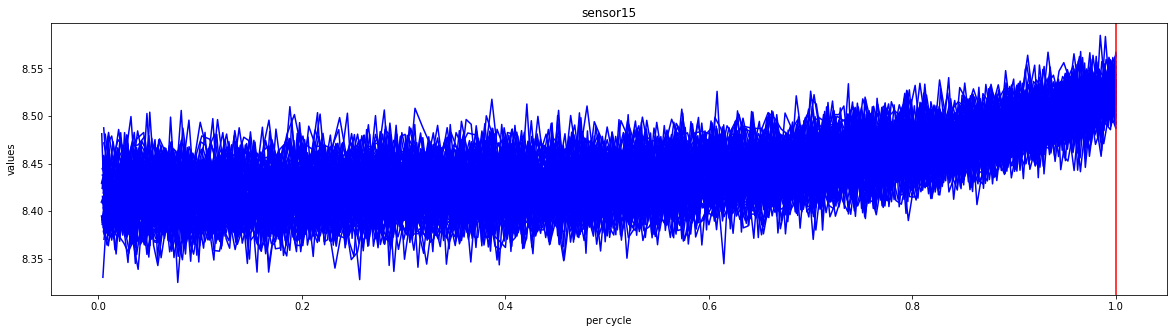

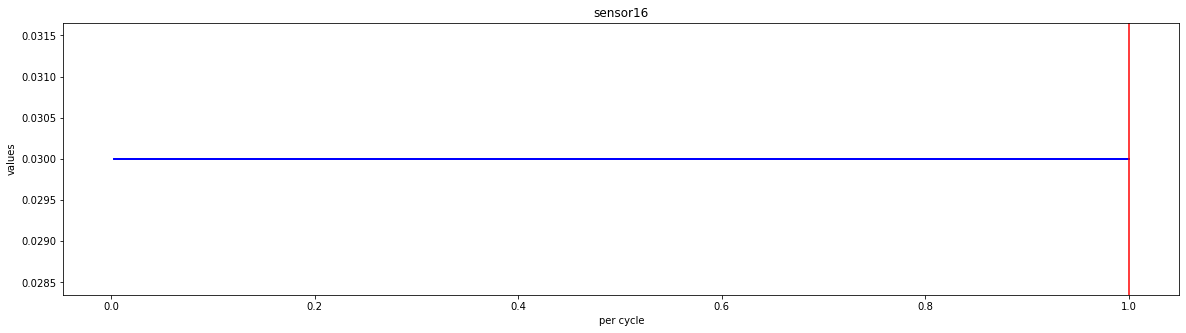

In [27]:
for j in range(4,20):
    plt.figure(figsize=[20,5])
    for i in range(1,100):
        plt.xlabel("per cycle")
        plt.ylabel("values")
        plt.title("sensor{}".format(j-3))
        plt.plot(train_data[train_data['id'] == i]['per_cycle'], train_data[train_data['id'] == i][train_data.columns[j]],color="b")

    plt.axvline(x=1, color='r')
    

<ipython-input-28-3472a44df75f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[5,5])
<ipython-input-28-3472a44df75f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[5,5])


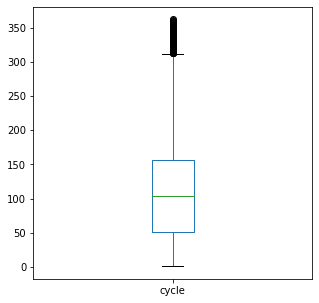

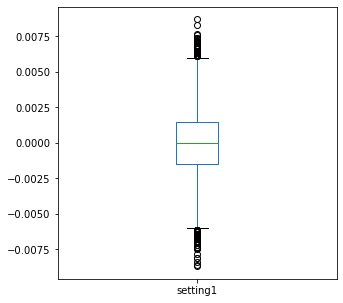

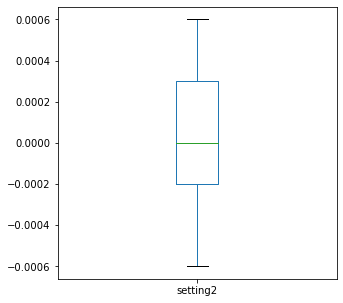

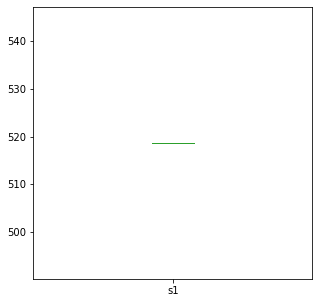

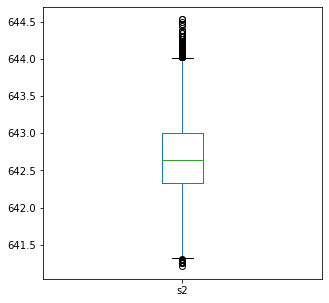

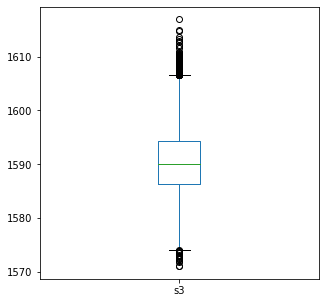

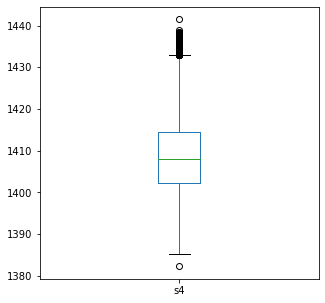

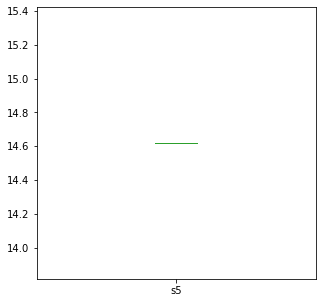

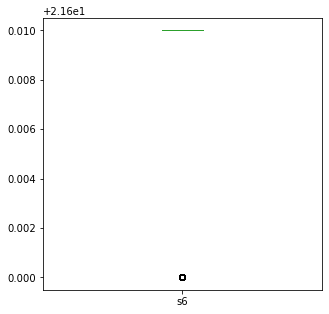

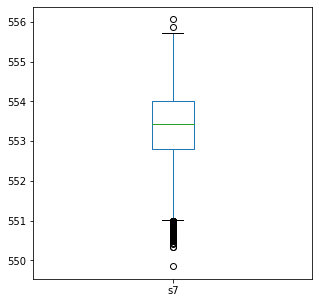

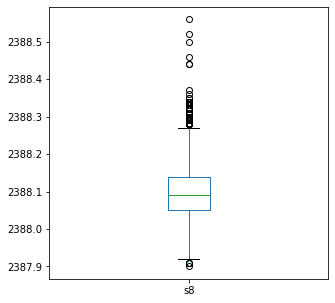

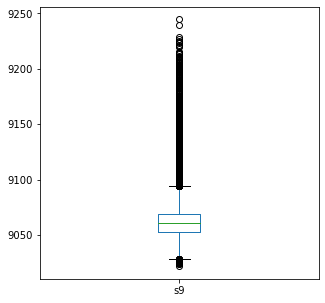

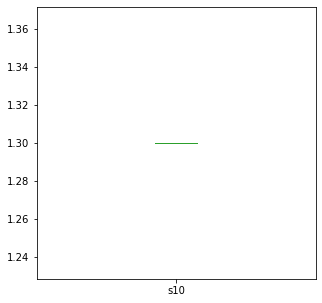

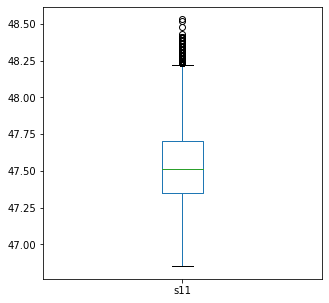

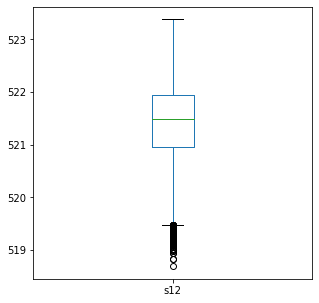

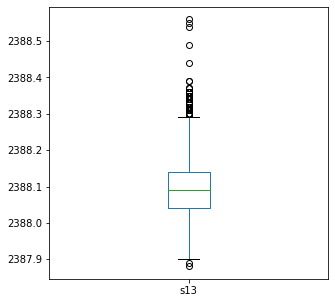

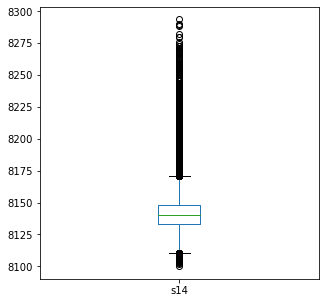

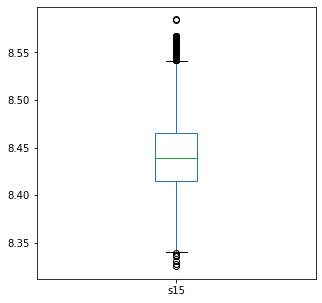

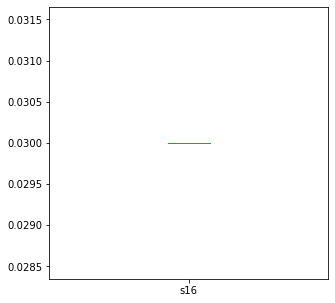

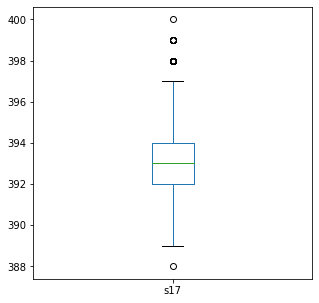

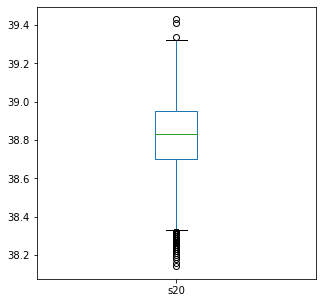

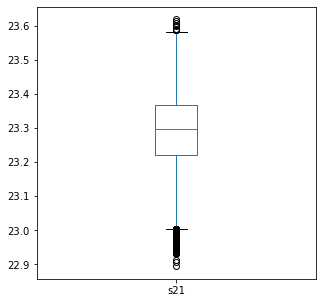

In [28]:
for i in range(1,23):
    plt.figure(figsize=[5,5])
    train_data[train_data.columns[i]].plot(kind="box")

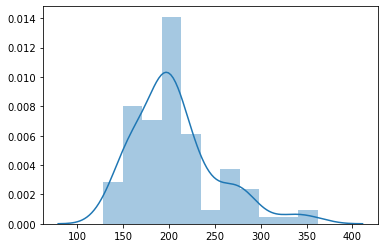

In [29]:
sns.distplot(count)

# Normalize 

In [30]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

# Max absolute scaling: Scale each feature by its maximum absolute value

In [31]:
def Normalize(data,features,normalize_type):
    data_nor=normalize_type().fit_transform(data[features])
    return data_nor

In [32]:
train_nor_MAS=Normalize(train_data,train_data.columns[1:23],MaxAbsScaler)

In [33]:
test_nor_MAS=Normalize(test_data,test_data.columns[1:23],MaxAbsScaler)

In [34]:
train_nor_MMS=Normalize(train_data,train_data.columns[1:23],MinMaxScaler)
test_nor_MMS=Normalize(test_data,test_data.columns[1:23],MinMaxScaler)

In [35]:
train_nor_MMS

array([[0.        , 0.45977011, 0.16666667, ..., 0.33333333, 0.71317829,
        0.7246617 ],
       [0.00277008, 0.6091954 , 0.25      , ..., 0.33333333, 0.66666667,
        0.73101353],
       [0.00554017, 0.25287356, 0.75      , ..., 0.16666667, 0.62790698,
        0.62137531],
       ...,
       [0.54570637, 0.52298851, 0.5       , ..., 0.83333333, 0.23255814,
        0.05399061],
       [0.54847645, 0.43678161, 0.75      , ..., 0.58333333, 0.11627907,
        0.23446562],
       [0.55124654, 0.31609195, 0.08333333, ..., 0.66666667, 0.17829457,
        0.21817178]])

In [36]:
train_nor_MAS[4]

array([ 0.01381215, -0.2183908 , -0.33333333,  1.        ,  0.99664872,
        0.97893513,  0.97553226,  1.        ,  1.        ,  0.99629536,
        0.99979067,  0.97950801,  1.        ,  0.97424274,  0.99772632,
        0.9997823 ,  0.98071794,  0.98189824,  1.        ,  0.9825    ,
        0.98655846,  0.99093927])

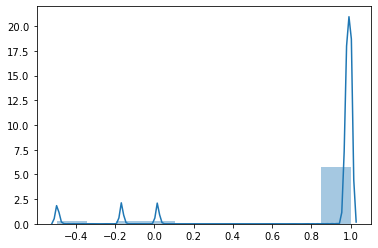

In [37]:
sns.distplot(train_nor_MAS[5], bins =10)

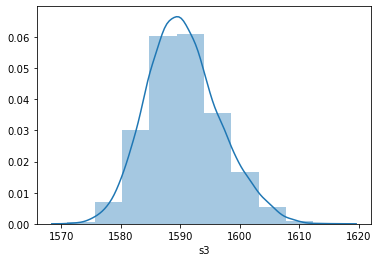

In [38]:
sns.distplot(train_data[train_data.columns[6]], bins =10)

# solution regression 

In [39]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error



In [40]:
test_data

,id,cycle,setting1,setting2,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s20,s21,label,bnc
0,1,1,0.0023,0.0003,518.67,643.02,1585.29,1398.21,14.62,21.61,...,521.72,2388.03,8125.55,8.4052,0.03,392,38.86,23.3735,142,0
1,1,2,-0.0027,-0.0003,518.67,641.71,1588.45,1395.42,14.62,21.61,...,522.16,2388.06,8139.62,8.3803,0.03,393,39.02,23.3916,141,0
2,1,3,0.0003,0.0001,518.67,642.46,1586.94,1401.34,14.62,21.61,...,521.97,2388.03,8130.10,8.4441,0.03,393,39.08,23.4166,140,0
3,1,4,0.0042,0.0000,518.67,642.44,1584.12,1406.42,14.62,21.61,...,521.38,2388.05,8132.90,8.3917,0.03,391,39.00,23.3737,139,0
4,1,5,0.0014,0.0000,518.67,642.51,1587.19,1401.92,14.62,21.61,...,522.15,2388.03,8129.54,8.4031,0.03,390,38.99,23.4130,138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,518.67,643.24,1599.45,1415.79,14.62,21.61,...,520.69,2388.00,8213.28,8.4715,0.03,394,38.65,23.1974,24,1
13092,100,195,-0.0011,-0.0001,518.67,643.22,1595.69,1422.05,14.62,21.61,...,521.05,2388.09,8210.85,8.4512,0.03,395,38.57,23.2771,23,1
13093,100,196,-0.0006,-0.0003,518.67,643.44,1593.15,1406.82,14.62,21.61,...,521.18,2388.04,8217.24,8.4569,0.03,395,38.62,23.2051,22,1
13094,100,197,-0.0038,0.0001,518.67,643.26,1594.99,1419.36,14.62,21.61,...,521.33,2388.08,8220.48,8.4711,0.03,395,38.66,23.2699,21,1


In [41]:
test_data.columns=['id', 'cycle', 'setting1', 'setting2', 's1', 's2', 's3', 's4', 's5',
       's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's20', 's21', 'label',"bnc"]

# USE RIDGE with out NORMALIZE

In [42]:
def regression_Ridge(train_data,train_label,test_data,test_label,feature,metric,plot=True): #explain parameter:train data,label
    l2_penalties=np.logspace(0,10,num=11)                       #test data ,label test label, feature selected,, metric selected
    score=[]
    weight=[]
    for i in l2_penalties:
        rid=Ridge(alpha=i).fit(train_data[feature],train_label)
        predict=rid.predict(test_data[feature])
        score.append(metric(predict,test_label))
        weight.append(rid.coef_)
    best_alpha=l2_penalties[score.index(min(score))]
    print("best score : " ,min(score))
    print("best_alpha is choice: ", best_alpha)
        
    #plot
    if(plot):
        fig = plt.figure(figsize=(16, 9))
        weight = pd.DataFrame(weight)
        x = np.logspace(0, 10, num=11)
        for i in range(len(feature)):
            plt.plot(x, weight.iloc[:,i], label = "weight {:d}".format(i))
        plt.xscale('log')
        plt.xlabel('alpha')

        plt.ylabel('weights')

        plt.legend(loc=0,fontsize='x-small')

        plt.show()
    

best score :  1836.0700853680003
best_alpha is choice:  100.0


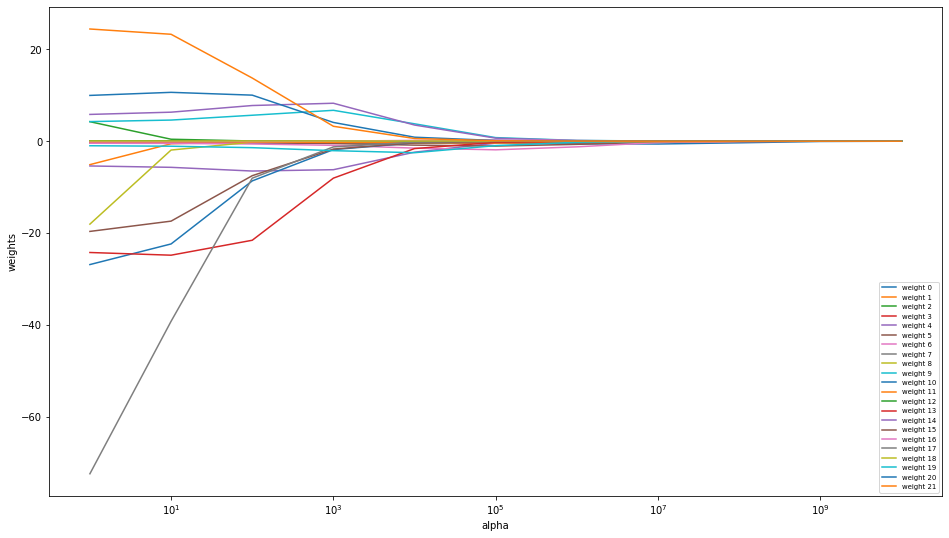

In [43]:
#test_function
regression_Ridge(train_data,train_data["label"],test_data,test_data["label"],train_data.columns[1:23],mean_squared_error)

# USE LASSO without normalize 

In [44]:
def regression_Lasso(train_data,train_label,test_data,test_label,feature,metric,plot=True):#explain parameter:train data,label train data 
    l1_penalties=np.logspace(0,10,num=11)                #test data ,label test label, feature selected,, metric selected
    score=[]
    weight=[]
    for i in l1_penalties:
        lasso=Lasso(alpha=i).fit(train_data[feature],train_label)
        predict=lasso.predict(test_data[feature])
        score.append(metric(predict,test_label))
        weight.append(lasso.coef_)
    best_alpha=l1_penalties[score.index(min(score))]
    
    
    best_lasso=Lasso(alpha=best_alpha).fit(train_data[feature],train_label)
    
    if(plot):    
        print("best score : " ,min(score))
        print("best_alpha is choice: ", best_alpha)
        fig = plt.figure(figsize=(16, 9))
        weight = pd.DataFrame(weight)
        x = np.logspace(0, 10, num=11)
        for i in range(len(feature)):
            plt.plot(x, weight.iloc[:,i], label = "weight {:d}".format(i))
        plt.xscale('log')
        plt.xlabel('alpha')

        plt.ylabel('weights')

        plt.legend(loc=0,fontsize='x-small')

        plt.show()
    return best_lasso.coef_

best score :  1849.17497696394
best_alpha is choice:  1.0


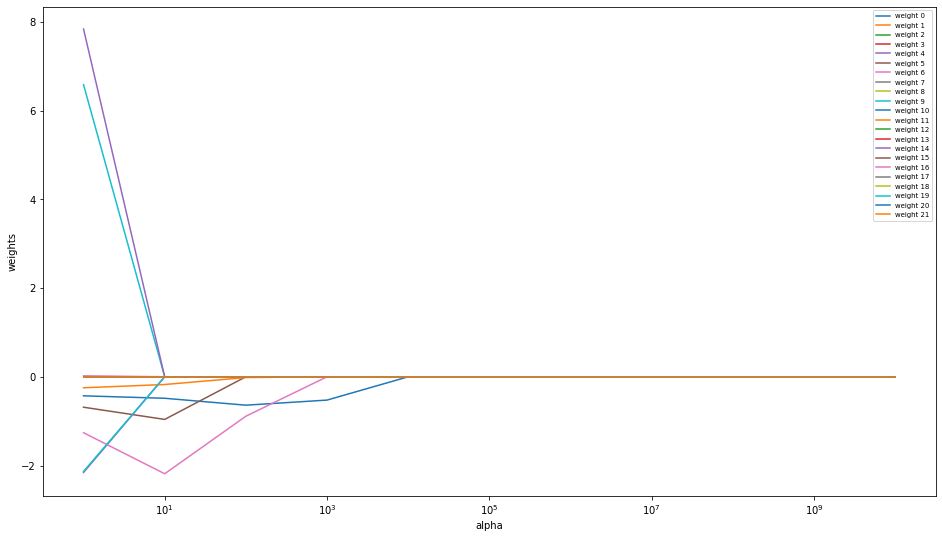

array([-0.42933987, -0.        ,  0.        ,  0.        , -2.1576998 ,
       -0.6860122 , -1.26088287, -0.        , -0.        ,  6.58374291,
       -0.        , -0.24799714,  0.        , -0.        ,  7.83876647,
       -0.        ,  0.02219467, -0.        , -0.        , -2.13400782,
        0.        ,  0.        ])

In [45]:
#test_function
regression_Lasso(train_data,train_data["label"],test_data,test_data["label"],train_data.columns[1:23],mean_squared_error)

# COMBINE WITHOUT normalize

In [46]:
def regression_Lasso_and_Ridge(train_data,train_label,test_data,test_label,feature,metric):
    coef_Lasso=regression_Lasso(train_data,train_label,test_data,test_label,feature,metric,plot=False)
    important_feature=feature[coef_Lasso!=0]
    regression_Ridge(train_data,train_label,test_data,test_label,important_feature,metric,plot=False)
    

In [47]:
regression_Lasso_and_Ridge(train_data,train_data["label"],test_data,test_data["label"],train_data.columns[1:23],mean_squared_error)

best score :  1847.1872216419647
best_alpha is choice:  1000.0


# Poly Regression

In [49]:
col = train_data.corr()['label'][np.abs(train_data.corr()['label'])>0.5].index.tolist()

In [50]:
col

['cycle',
 's2',
 's3',
 's4',
 's7',
 's8',
 's11',
 's12',
 's13',
 's15',
 's17',
 's20',
 's21',
 'label',
 'bnc',
 'per_cycle']

In [ ]:
col.remove('label')

In [ ]:
xtrain = train_data[col]
ytrain = train_data['label']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [ ]:
pr = PF(degree = 3)
xtrain_pr =  pr.fit_transform(xtrain)

In [ ]:
rr = Ridge()

In [ ]:
rr.fit(xtrain_pr, ytrain)

In [ ]:
xtest = TEST_DATA[col]

In [ ]:
ytest = TEST_DATA['ttf']

In [ ]:
mean_squared_error(ytest, rr.predict(pr.fit_transform(xtest)))

In [ ]:
plt.figure(figsize=[13,8])
for i in range(7,8):
    plt.plot(train_data[train_data['id'] == i]['cycle'], train_data[train_data['id'] == i]['s11'], label =i)
plt.legend()

In [ ]:
#import 
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(train_data[train_data.columns[1:23]],train_data['label'])

In [ ]:
print(DTR.feature_importances_)
print(np.flipud(np.argsort(DTR.feature_importances_)))

In [ ]:
feature=train_data[train_data.columns[1:23]]

In [ ]:
feature[feature.columns[14]]

In [ ]:
mean_squared_error(DTR.predict(test_data[train_data.columns[1:23]]),test_data["label"])

In [ ]:
DTR.set_params()

In [ ]:
plt.figure(figsize=[20,5])
plt.plot(DTR.predict(test_data[train
                               _data.columns[1:23]]),color="r")
plt.plot(test_data["label"])

In [ ]:
def objective(trial: Trial):
    